<b>
Name : Anish Rajesh Adnani
<br>
USC ID : 4092610491
<br>
USC Email ID : adnani@usc.edu
<br>
Github Username : midnightbot
<br>
    </b>

<b> 1. Supervised, Semi-Supervised, and Unsupervised Learning</b>

<b> 1. (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29 . Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data , which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.</b>

In [1]:
## all imports
import pandas as pd  ## used for data manipulation
import numpy as np  ## used for calculations
from sklearn.model_selection import train_test_split  ## used for train test split
from sklearn import preprocessing  ## used for min-max scalar
import copy ## used to copy data
from sklearn.svm import LinearSVC  ## used for svc
from sklearn.model_selection import GridSearchCV  ## used for finding optimal parameters
from sklearn.model_selection import KFold  ## used for clustering
from sklearn.metrics import accuracy_score  ## used for finding accuracy score
from sklearn.metrics import roc_curve  ## used for roc curve
from sklearn.metrics import auc  ## used for finding area under curve
import warnings  ## ignore warnings
from sklearn.metrics import confusion_matrix  ## used for finding confusion matrix
import matplotlib.pyplot as plt ## used for plotting
from sklearn.cluster import KMeans  ## used for kmeans
from sklearn.cluster import SpectralClustering  ## used for spectral clustering
from sklearn.metrics.pairwise import euclidean_distances  ## used for calculating euclidean dist
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_file = "../data/wdbc.data"
data_file_cols = "../data/wdbc.names"

In [3]:
fts = ["radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave points", "symmetry", "fractal dimension"]

In [4]:
cols = ['ID', 'Class'] + ["mean_"+x for x in fts] + ["std_error_"+x for x in fts] + ["worst_"+x for x in fts]

In [5]:
full_df = pd.read_csv(data_file, header=None, names = cols)

In [6]:
display(full_df)

,ID,Class,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave points,worst_symmetry,worst_fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<b> 1. (b) Monte-Carlo Simulation : Repeat the following procedures for supervised, un- supervised, and semi-supervised learning M = 30 times, and use randomly se- lected train and test data (make sure you use 20% of both the positve and nega- tive classes as the test set). Then compare the average scores (accuracy, precision, recall, F 1 -score, and AUC) that you obtain from each algorithm</b>

<b> 1. (b) (i) Supervised Learning: Train an L 1 -penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F 1 -score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs</b>

In [7]:
predictors = copy.deepcopy(cols)
predictors.remove('Class')
predictors.remove('ID')
total_iterations = 30
monitor = ["avg_train_acc", "avg_test_acc", "avg_train_precision", "avg_test_precision", "avg_train_recall", "avg_test_recall", "avg_train_f1_score", "avg_test_f1_score", "avg_train_auc", "avg_test_auc"]
sup_result = {x:0 for x in monitor}
for it in range(0, total_iterations):
    
    ## making malignant and benign data
    malignant_df = full_df.loc[full_df['Class']=='M']
    benign_df = full_df.loc[full_df['Class']=='B']
    
    ## train test splits for both classes
    malignant_train_X, malignant_test_X, malignant_train_Y, malignant_test_Y = train_test_split( malignant_df[predictors], malignant_df[['Class']], test_size = 0.2, shuffle=True)
    benign_train_X, benign_test_X, benign_train_Y, benign_test_Y = train_test_split( benign_df[predictors], benign_df[['Class']], test_size = 0.2, shuffle=True)
    
    
    ## making combined train test data
    train_X = [malignant_train_X, benign_train_X]
    train_X = pd.concat(train_X)

    train_Y = [malignant_train_Y, benign_train_Y]
    train_Y = pd.concat(train_Y)

    test_X = [malignant_test_X, benign_test_X]
    test_X = pd.concat(test_X)

    test_Y = [malignant_test_Y, benign_test_Y]
    test_Y = pd.concat(test_Y)
    
    ## normalize the data
    min_max_scaler = preprocessing.MinMaxScaler().fit(train_X)  ## fit on train data
    train_X = min_max_scaler.transform(train_X)  ## transform train data
    test_X = min_max_scaler.transform(test_X)  ## transform test data
    
    ## c range
    c_vals = [1,10,100,1000]
    
    ## linear svc
    l1_svm_model = LinearSVC(penalty='l1', dual=False)
    l1_svm_params = {'C': c_vals}
    l1_grid_svm = GridSearchCV(l1_svm_model, l1_svm_params, cv=KFold(5))
    l1_grid_svm = l1_grid_svm.fit(train_X, train_Y)
    
    ## prediction and results
    preds_train_Y = l1_grid_svm.predict(train_X)
    preds_test_Y = l1_grid_svm.predict(test_X)
    
    train_acc = accuracy_score(preds_train_Y, train_Y)
    test_acc = accuracy_score(preds_test_Y, test_Y)
    
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(train_Y, preds_train_Y).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(test_Y, preds_test_Y).ravel()
    
    train_precision = train_tp / (train_tp + train_fp)
    test_precision = test_tp / (test_tp + test_fp)
    
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    
    train_f_score = (2 * train_precision * train_recall) / (train_precision + train_recall)
    test_f_score = (2 * test_precision * test_recall) / (test_precision + test_recall)
    
    pred_train_prob = l1_grid_svm.decision_function(train_X)
    pred_test_prob = l1_grid_svm.decision_function(test_X)
    train_fpr, train_tpr, train_threshold = roc_curve(train_Y, pred_train_prob, pos_label='M')
    test_fpr, test_tpr, test_threshold = roc_curve(test_Y, pred_test_prob, pos_label='M')
    
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    sup_result['avg_train_acc']+=train_acc
    sup_result['avg_test_acc']+=test_acc
    sup_result['avg_train_precision']+=train_precision
    sup_result['avg_test_precision']+=test_precision
    sup_result['avg_train_recall']+=train_recall
    sup_result['avg_test_recall']+=test_recall
    sup_result['avg_train_f1_score']+=train_f_score
    sup_result['avg_test_f1_score']+=test_f_score
    sup_result['avg_train_auc']+=train_auc
    sup_result['avg_test_auc']+=test_auc
    
    

In [8]:
## averaging the result
for x in sup_result:
    sup_result[x]/=total_iterations
    
print("Result for Supervised Learning")
print(sup_result)

Result for Supervised Learning
{'avg_train_acc': 0.9870778267254041, 'avg_test_acc': 0.9686956521739133, 'avg_train_precision': 0.9923709645330703, 'avg_test_precision': 0.9782852433396508, 'avg_train_recall': 0.9727810650887572, 'avg_test_recall': 0.937984496124031, 'avg_train_f1_score': 0.9824441083883924, 'avg_test_f1_score': 0.9569150156110324, 'avg_train_auc': 0.9980566801619434, 'avg_test_auc': 0.9934646856158486}


Avg Train Acc ==>  0.9870778267254041
Avg Train Precision ==>  0.9923709645330703
Avg Train Recall ==>  0.9727810650887572
Avg Train F1 Score ==>  0.9824441083883924
Avg Train AUC ==>  0.9980566801619434
------------------------------------------------------
Confusion Matrix for Train Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),164,5
1,Actual Neg(B),1,284


------------------------------------------------------


(0.0, 1.5)

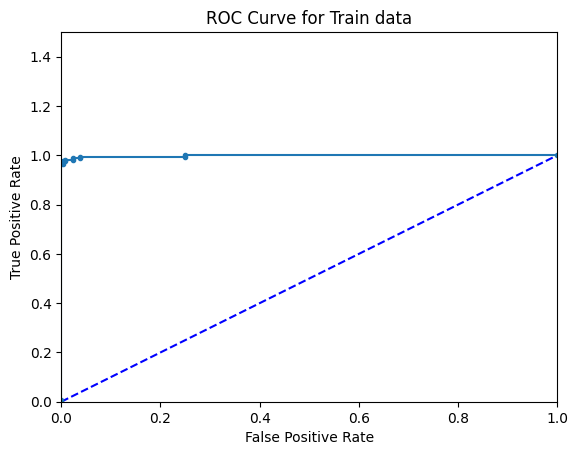

In [9]:
print("Avg Train Acc ==> ", sup_result['avg_train_acc'])
print("Avg Train Precision ==> ", sup_result['avg_train_precision'])
print("Avg Train Recall ==> ", sup_result['avg_train_recall'])
print("Avg Train F1 Score ==> ", sup_result['avg_train_f1_score'])
print("Avg Train AUC ==> ", sup_result['avg_train_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Train Data")
sup_train_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
sup_train_rows = []
sup_train_rows.append(["Actual Pos(M)", train_tp, train_fn])
sup_train_rows.append(["Actual Neg(B)", train_fp, train_tn])
sup_train_conf_mat = pd.DataFrame(data=sup_train_rows, columns=sup_train_cols)
display(sup_train_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(train_fpr, train_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Train data")
plt.xlim([0,1])
plt.ylim([0,1.5])

Avg Test Acc ==>  0.9686956521739133
Avg Test Precision ==>  0.9782852433396508
Avg Test Recall ==>  0.937984496124031
Avg Test F1 Score ==>  0.9569150156110324
Avg Test AUC ==>  0.9934646856158486
------------------------------------------------------
Confusion Matrix for Test Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),43,0
1,Actual Neg(B),1,71


------------------------------------------------------


(0.0, 1.5)

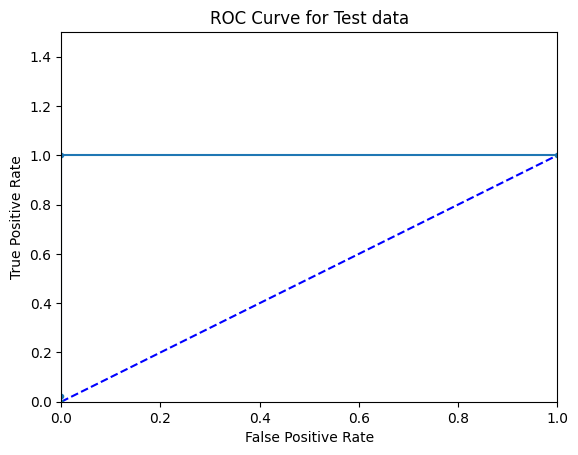

In [10]:
print("Avg Test Acc ==> ", sup_result['avg_test_acc'])
print("Avg Test Precision ==> ", sup_result['avg_test_precision'])
print("Avg Test Recall ==> ", sup_result['avg_test_recall'])
print("Avg Test F1 Score ==> ", sup_result['avg_test_f1_score'])
print("Avg Test AUC ==> ", sup_result['avg_test_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Test Data")
sup_test_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
sup_test_rows = []
sup_test_rows.append(["Actual Pos(M)", test_tp, test_fn])
sup_test_rows.append(["Actual Neg(B)", test_fp, test_tn])
sup_test_conf_mat = pd.DataFrame(data=sup_test_rows, columns=sup_test_cols)
display(sup_test_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(test_fpr, test_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Test data")
plt.xlim([0,1])
plt.ylim([0,1.5])

<b> 1.(b)(ii) Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data . You can select them randomly.</b>

<b> 1.(b) (ii) (A) Train an L 1 -penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation</b>

<b> 1.(b) (ii) (B) Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F 1 -score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.</b>

In [11]:

predictors = copy.deepcopy(cols)
predictors.remove('Class')
predictors.remove('ID')
total_iterations = 30
monitor = ["avg_train_acc", "avg_test_acc", "avg_train_precision", "avg_test_precision", "avg_train_recall", "avg_test_recall", "avg_train_f1_score", "avg_test_f1_score", "avg_train_auc", "avg_test_auc"]
semi_sup_result = {x:0 for x in monitor}
for it in range(0, total_iterations):
    
    ## making malignant and benign data
    malignant_df = full_df.loc[full_df['Class']=='M']
    benign_df = full_df.loc[full_df['Class']=='B']
    
    ## train test splits for both classes 20% split
    malignant_train, malignant_test = train_test_split(malignant_df, test_size = 0.2, shuffle=True)
    benign_train, benign_test = train_test_split(benign_df, test_size = 0.2, shuffle=True)
    
    ## making combined train test data
    train_X = [malignant_train, benign_train]
    train = pd.concat(train_X)

    test_X = [malignant_test, benign_test]
    test = pd.concat(test_X)
    
    ## splits for labelled and unlabelled data 50% split
    lbl_mal, unlbl_mal = train_test_split(malignant_train, test_size=0.5)
    lbl_ben, unlbl_ben = train_test_split(benign_train, test_size=0.5)
        
    lbl_train = pd.concat([lbl_mal, lbl_ben])
    unlbl_train = pd.concat([unlbl_mal, unlbl_ben])
    
    lbl_train_X = lbl_train[predictors]
    lbl_train_Y = lbl_train['Class']
    
    unlbl_train_X = unlbl_train[predictors]
    unlbl_train_Y = unlbl_train['Class']
    
    ## normalize the data
    min_max_scaler = preprocessing.MinMaxScaler().fit(lbl_train_X)  ## fit on train data
    lbl_train_X = min_max_scaler.transform(lbl_train_X)  ## transform train data
    unlbl_train_X = min_max_scaler.transform(unlbl_train_X)  ## transform test data
    
    ## c range
    c_vals = [1,10,100,1000]
    
    ## linear svc
    l1_svm_model = LinearSVC(penalty='l1', dual=False)
    l1_svm_params = {'C': c_vals}
    l1_grid_svm = GridSearchCV(l1_svm_model, l1_svm_params, cv=KFold(5))
    l1_grid_svm = l1_grid_svm.fit(lbl_train_X, lbl_train_Y)
    
    ## unlabel to label conversion
    while len(unlbl_train)!=0:
        unlbl_dist = l1_grid_svm.decision_function(unlbl_train[predictors])
        unlbl_distances = []
        j = 0
        for i in unlbl_train.index:
            unlbl_distances.append([i, unlbl_dist[j]])
            j+=1

        unlbl_distances = sorted(unlbl_distances , key=lambda x:x[1], reverse=True)
        farthest_point_index = unlbl_distances[0][0]
        predicted_lbl = l1_grid_svm.predict([unlbl_train.loc[farthest_point_index][predictors]])
        pred_class_df = pd.DataFrame(predicted_lbl, columns=['Class'])
        pred_class_df.set_index(pd.Series([farthest_point_index]), inplace=True)
        ft_data = pd.DataFrame([unlbl_train.loc[farthest_point_index][predictors]])
        new_lbl_data = pd.merge(ft_data, pred_class_df, left_index=True, right_index=True)
        
        lbl_train = pd.concat([lbl_train, new_lbl_data])
        unlbl_train = unlbl_train.drop(index=farthest_point_index)
        l1_grid_svm = l1_grid_svm.fit(lbl_train[predictors], lbl_train['Class'])
        
    ## prediction and results
    train_X = train[predictors]
    train_Y = train['Class']
    test_X = test[predictors]
    test_Y = test['Class']
    preds_train_Y = l1_grid_svm.predict(train_X)
    preds_test_Y = l1_grid_svm.predict(test_X)
    
    train_acc = accuracy_score(preds_train_Y, train_Y)
    test_acc = accuracy_score(preds_test_Y, test_Y)
    
    train_tn, train_fp, train_fn, train_tp = confusion_matrix(train_Y, preds_train_Y).ravel()
    test_tn, test_fp, test_fn, test_tp = confusion_matrix(test_Y, preds_test_Y).ravel()
    
    train_precision = train_tp / (train_tp + train_fp)
    test_precision = test_tp / (test_tp + test_fp)
    
    train_recall = train_tp/(train_tp + train_fn)
    test_recall = test_tp/(test_tp + test_fn)
    
    train_f_score = (2 * train_precision * train_recall) / (train_precision + train_recall)
    test_f_score = (2 * test_precision * test_recall) / (test_precision + test_recall)
    
    pred_train_prob = l1_grid_svm.decision_function(train_X)
    pred_test_prob = l1_grid_svm.decision_function(test_X)
    train_fpr, train_tpr, train_threshold = roc_curve(train_Y, pred_train_prob, pos_label='M')
    test_fpr, test_tpr, test_threshold = roc_curve(test_Y, pred_test_prob, pos_label='M')
    
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    semi_sup_result['avg_train_acc']+=train_acc
    semi_sup_result['avg_test_acc']+=test_acc
    semi_sup_result['avg_train_precision']+=train_precision
    semi_sup_result['avg_test_precision']+=test_precision
    semi_sup_result['avg_train_recall']+=train_recall
    semi_sup_result['avg_test_recall']+=test_recall
    semi_sup_result['avg_train_f1_score']+=train_f_score
    semi_sup_result['avg_test_f1_score']+=test_f_score
    semi_sup_result['avg_train_auc']+=train_auc
    semi_sup_result['avg_test_auc']+=test_auc


In [12]:
## averaging the result
for x in semi_sup_result:
    semi_sup_result[x]/=total_iterations
    
print("Result for Semi Supervised Learning")
print(semi_sup_result)

Result for Semi Supervised Learning
{'avg_train_acc': 0.9716593245227609, 'avg_test_acc': 0.951304347826087, 'avg_train_precision': 0.9559600600610679, 'avg_test_precision': 0.9360154289738662, 'avg_train_recall': 0.9690335305719918, 'avg_test_recall': 0.9348837209302329, 'avg_train_f1_score': 0.9622919734587115, 'avg_test_f1_score': 0.9348375034208283, 'avg_train_auc': 0.9946565625108135, 'avg_test_auc': 0.9890073212747634}


Avg Train Acc ==>  0.9716593245227609
Avg Train Precision ==>  0.9559600600610679
Avg Train Recall ==>  0.9690335305719918
Avg Train F1 Score ==>  0.9622919734587115
Avg Train AUC ==>  0.9946565625108135
------------------------------------------------------
Confusion Matrix for Train Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),164,5
1,Actual Neg(B),8,277


------------------------------------------------------


(0.0, 1.5)

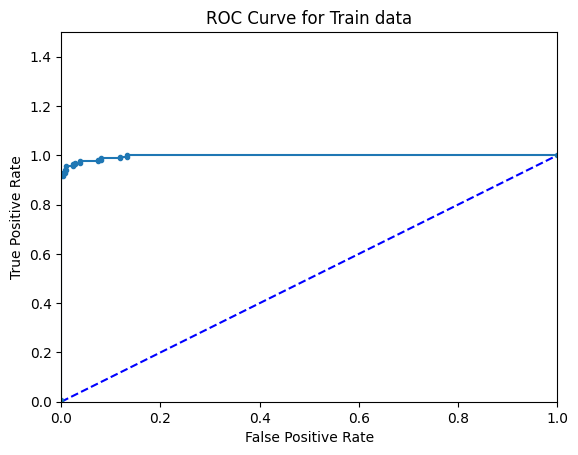

In [13]:
print("Avg Train Acc ==> ", semi_sup_result['avg_train_acc'])
print("Avg Train Precision ==> ", semi_sup_result['avg_train_precision'])
print("Avg Train Recall ==> ", semi_sup_result['avg_train_recall'])
print("Avg Train F1 Score ==> ", semi_sup_result['avg_train_f1_score'])
print("Avg Train AUC ==> ", semi_sup_result['avg_train_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Train Data")
semi_sup_train_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
semi_sup_train_rows = []
semi_sup_train_rows.append(["Actual Pos(M)", train_tp, train_fn])
semi_sup_train_rows.append(["Actual Neg(B)", train_fp, train_tn])
semi_sup_train_conf_mat = pd.DataFrame(data=semi_sup_train_rows, columns=semi_sup_train_cols)
display(semi_sup_train_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(train_fpr, train_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Train data")
plt.xlim([0,1])
plt.ylim([0,1.5])

Avg Test Acc ==>  0.951304347826087
Avg Test Precision ==>  0.9360154289738662
Avg Test Recall ==>  0.9348837209302329
Avg Test F1 Score ==>  0.9348375034208283
Avg Test AUC ==>  0.9890073212747634
------------------------------------------------------
Confusion Matrix for Test Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),40,3
1,Actual Neg(B),3,69


------------------------------------------------------


(0.0, 1.5)

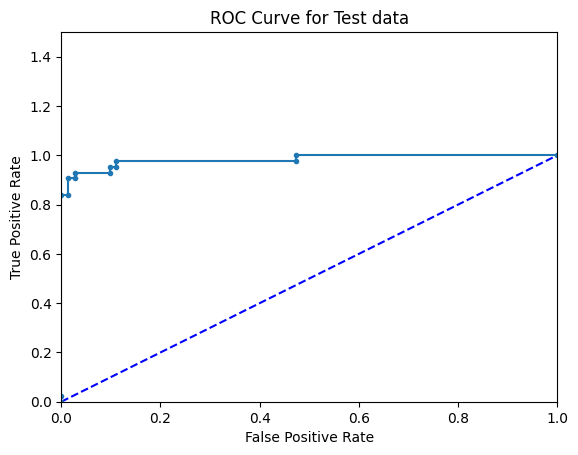

In [14]:
print("Avg Test Acc ==> ", semi_sup_result['avg_test_acc'])
print("Avg Test Precision ==> ", semi_sup_result['avg_test_precision'])
print("Avg Test Recall ==> ", semi_sup_result['avg_test_recall'])
print("Avg Test F1 Score ==> ", semi_sup_result['avg_test_f1_score'])
print("Avg Test AUC ==> ", semi_sup_result['avg_test_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Test Data")
semi_sup_test_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
semi_sup_test_rows = []
semi_sup_test_rows.append(["Actual Pos(M)", test_tp, test_fn])
semi_sup_test_rows.append(["Actual Neg(B)", test_fp, test_tn])
semi_sup_test_conf_mat = pd.DataFrame(data=semi_sup_test_rows, columns=semi_sup_test_cols)
display(semi_sup_test_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(test_fpr, test_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Test data")
plt.xlim([0,1])
plt.ylim([0,1.5])

<b> 1.(b) (iii) Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2</b>

<b> 1.(b)(iii) (A) Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum? </b>

<b> 1.(b) (iii) (B) Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs</b>

<b> 1.(b) (iii) (C) Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F 1 -score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.</b>

In [15]:
print('K-means algorithm promises to find a minima (local or global minimum)')
print('For K-means to not get trapped in local minima we can run k-means multipls times and takes the most optimal solution')
print('randomizing intial clusters will lead to different final clusters in each run')
print("Therefore best approach is to run the algorithm multiple times with different initial clusters seeds")
print("From all the obtained clustering results we choose the one with lowest error")

K-means algorithm promises to find a minima (local or global minimum)
For K-means to not get trapped in local minima we can run k-means multipls times and takes the most optimal solution
randomizing intial clusters will lead to different final clusters in each run
Therefore best approach is to run the algorithm multiple times with different initial clusters seeds
From all the obtained clustering results we choose the one with lowest error


In [16]:
## pos class - M , neg class - B
predictors = copy.deepcopy(cols)
predictors.remove('Class')
predictors.remove('ID')
total_iterations = 30
monitor = ["avg_train_acc", "avg_test_acc", "avg_train_precision", "avg_test_precision", "avg_train_recall", "avg_test_recall", "avg_train_f1_score", "avg_test_f1_score", "avg_train_auc", "avg_test_auc"]
unsup_result = {x:0 for x in monitor}
unsup_test_data_X = {}
unsup_test_data_Y = {}
cluster_centroids = {}
cluster_labels = {}
for it in range(0, total_iterations):
    ## making malignant and benign data
    malignant_df = full_df.loc[full_df['Class']=='M']
    benign_df = full_df.loc[full_df['Class']=='B']
    
    ## train test splits for both classes 20% split
    malignant_train, malignant_test = train_test_split(malignant_df, test_size = 0.2, shuffle=True)
    benign_train, benign_test = train_test_split(benign_df, test_size = 0.2, shuffle=True)
    
    ## making combined train test data
    arr = [malignant_train, benign_train]
    train = pd.concat(arr)
    train = train.reset_index(drop=True)
    
    arr = [malignant_test, benign_test]
    test = pd.concat(arr)
    test = test.reset_index(drop=True)
    
    train_X = train[predictors]
    train_Y = train['Class']
    test_X = test[predictors]
    test_Y = test['Class']
    
    
    ## normalize the data
    min_max_scaler = preprocessing.MinMaxScaler().fit(train_X)  ## fit on train data
    train_X = min_max_scaler.transform(train_X)  ## transform train data
    test_X = min_max_scaler.transform(test_X)  ## transform test data

    ## saving the test data for this run
    unsup_test_data_X[it] = test_X
    unsup_test_data_Y[it] = test_Y
    
    ## k-means model
    k_means_model = KMeans(n_clusters=2, init='random')
    k_means_model = k_means_model.fit(train_X)
    
    cluster_center = k_means_model.cluster_centers_
    cluster_centroids[it] = cluster_center
    
    cluster_sample_dist = euclidean_distances(train_X, cluster_center)
    
    cluster1 = []
    cluster2 = []
    
    train_data_len = len(train_X)
    for x in range(train_data_len):
        cluster1.append([x,cluster_sample_dist[x][0]])
        cluster2.append([x,cluster_sample_dist[x][1]])
        
    cluster1_sorted = sorted(cluster1, key = lambda x:x[1])
    cluster2_sorted = sorted(cluster2, key = lambda x:x[1])
    
    ## closest 30 points to each center
    label1_count = {}
    for indx,dist in cluster1_sorted[:30]:
        og_class = train_Y[indx]
        label1_count[og_class] = label1_count.get(og_class,0) + 1
        
    label2_count = {}
    for indx,dist in cluster2_sorted[:30]:
        og_class = train_Y[indx]
        label2_count[og_class] = label2_count.get(og_class,0) + 1
        
    #print(label1_count, label2_count) ##remove
    
    label1_count = [[x, label1_count[x]] for x in label1_count]
    label2_count = [[x, label2_count[x]] for x in label2_count]
    label1_count = sorted(label1_count, key = lambda x:-x[1])
    label2_count = sorted(label2_count, key = lambda x:-x[1])
    cluster1_label_name = label1_count[0][0]
    cluster2_label_name = label2_count[0][0]
    #print(cluster1_label_name, cluster2_label_name) ## remove
    
    cluster_labels[it] = [cluster1_label_name, cluster2_label_name]
    
    train_tp, train_tn, train_fp, train_fn = 0,0,0,0
    
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if c1_dist < c2_dist:
            if train_Y[x] == 'M':
                if cluster1_label_name == 'M':
                    train_tp+=1
                else:
                    train_fn+=1
            else:
                if cluster1_label_name == 'B':
                    train_tn+=1
                else:
                    train_fp+=1  
        else:
            if train_Y[x] == 'M':
                if cluster2_label_name == 'M':
                    train_tp+=1
                else:
                    train_fn+=1
            else:
                if cluster2_label_name == 'B':
                    train_tn+=1
                else:
                    train_fp+=1
    #print(train_tp)       
    train_acc = (train_tp + train_tn)/len(train_X)
    train_precision = train_tp / (train_tp + train_fp)
    train_recall = train_tp / (train_tp + train_fn)
    train_f_score = (2 * train_precision * train_recall) / (train_precision + train_recall)
    
    cluster_train_pred_prob = []
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if cluster1_label_name == 'B':
            cluster_train_pred_prob.append(c1_dist)
        else:
            cluster_train_pred_prob.append(c2_dist)
            
    train_fpr, train_tpr, train_threshold = roc_curve(train_Y, cluster_train_pred_prob, pos_label='M')
    
    train_auc = auc(train_fpr, train_tpr)
    unsup_result['avg_train_acc'] += train_acc
    unsup_result['avg_train_precision']+=train_precision
    unsup_result['avg_train_recall']+=train_recall
    unsup_result['avg_train_f1_score']+=train_f_score
    unsup_result['avg_train_auc']+=train_auc

In [17]:
## pos class - M , neg class - B
predictors = copy.deepcopy(cols)
predictors.remove('Class')
predictors.remove('ID')
total_iterations = 30
for it in range(0, total_iterations):
    test_X = unsup_test_data_X[it]
    test_Y = unsup_test_data_Y[it]
    
    cluster_sample_dist = euclidean_distances(test_X, cluster_centroids[it])
    this_cluster_labels = cluster_labels[it]
    
    cluster1_label_name = this_cluster_labels[0]
    cluster2_label_name = this_cluster_labels[1]
    
    test_tp, test_tn, test_fp, test_fn = 0,0,0,0
    
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if c1_dist < c2_dist:
            if test_Y[x] == 'M':
                if cluster1_label_name == 'M':
                    test_tp+=1
                else:
                    test_fn+=1
            else:
                if cluster1_label_name == 'B':
                    test_tn+=1
                else:
                    test_fp+=1  
        else:
            if test_Y[x] == 'M':
                if cluster2_label_name == 'M':
                    test_tp+=1
                else:
                    test_fn+=1
            else:
                if cluster2_label_name == 'B':
                    test_tn+=1
                else:
                    test_fp+=1
         
    test_acc = (test_tp + test_tn)/len(test_X)
    test_precision = test_tp / (test_tp + test_fp)
    test_recall = test_tp / (test_tp + test_fn)
    test_f_score = (2 * test_precision * test_recall) / (test_precision + test_recall)
    
    cluster_test_pred_prob = []
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if cluster1_label_name == 'B':
            cluster_test_pred_prob.append(c1_dist)
        else:
            cluster_test_pred_prob.append(c2_dist)
            
    test_fpr, test_tpr, test_threshold = roc_curve(test_Y, cluster_test_pred_prob, pos_label='M')
    
    test_auc = auc(test_fpr, test_tpr)
    unsup_result['avg_test_acc'] += test_acc
    unsup_result['avg_test_precision']+=test_precision
    unsup_result['avg_test_recall']+=test_recall
    unsup_result['avg_test_f1_score']+=test_f_score
    unsup_result['avg_test_auc']+=test_auc

In [18]:
## averaging the result
for x in semi_sup_result:
    unsup_result[x]/=total_iterations
    
print("Result for UnSupervised Learning")
print(unsup_result)

Result for UnSupervised Learning
{'avg_train_acc': 0.92503671071953, 'avg_test_acc': 0.928985507246377, 'avg_train_precision': 0.950550412999311, 'avg_test_precision': 0.9567533279022364, 'avg_train_recall': 0.8428007889546353, 'avg_test_recall': 0.8496124031007753, 'avg_train_f1_score': 0.8932377204331635, 'avg_test_f1_score': 0.8989760485005284, 'avg_train_auc': 0.9269940136336896, 'avg_test_auc': 0.9313092161929372}


Avg Train Acc ==>  0.92503671071953
Avg Train Precision ==>  0.950550412999311
Avg Train Recall ==>  0.8428007889546353
Avg Train F1 Score ==>  0.8932377204331635
Avg Train AUC ==>  0.9269940136336896
------------------------------------------------------
Confusion Matrix for Train Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),144,25
1,Actual Neg(B),9,276


------------------------------------------------------


(0.0, 1.5)

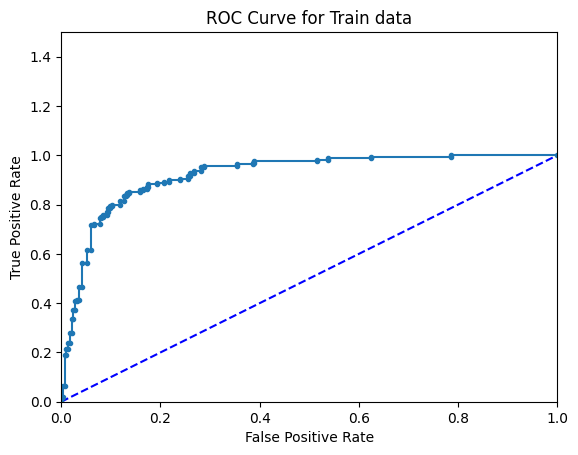

In [19]:
print("Avg Train Acc ==> ", unsup_result['avg_train_acc'])
print("Avg Train Precision ==> ", unsup_result['avg_train_precision'])
print("Avg Train Recall ==> ", unsup_result['avg_train_recall'])
print("Avg Train F1 Score ==> ", unsup_result['avg_train_f1_score'])
print("Avg Train AUC ==> ", unsup_result['avg_train_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Train Data")
unsup_train_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
unsup_train_rows = []
unsup_train_rows.append(["Actual Pos(M)", train_tp, train_fn])
unsup_train_rows.append(["Actual Neg(B)", train_fp, train_tn])
unsup_train_conf_mat = pd.DataFrame(data=unsup_train_rows, columns=unsup_train_cols)
display(unsup_train_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(train_fpr, train_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Train data")
plt.xlim([0,1])
plt.ylim([0,1.5])

Avg Test Acc ==>  0.928985507246377
Avg Test Precision ==>  0.9567533279022364
Avg Test Recall ==>  0.8496124031007753
Avg Test F1 Score ==>  0.8989760485005284
Avg Test AUC ==>  0.9313092161929372
------------------------------------------------------
Confusion Matrix for Test Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),38,5
1,Actual Neg(B),3,69


------------------------------------------------------


(0.0, 1.5)

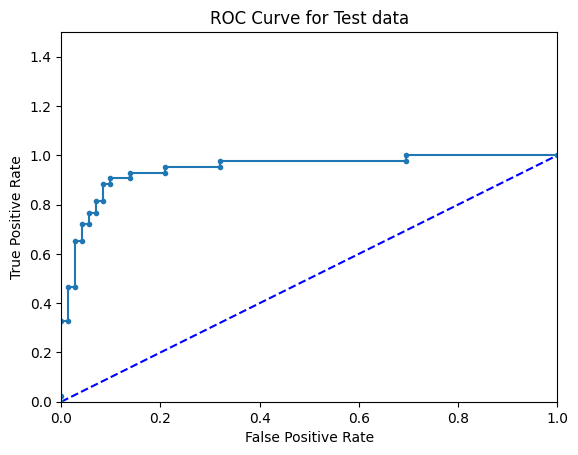

In [20]:
print("Avg Test Acc ==> ", unsup_result['avg_test_acc'])
print("Avg Test Precision ==> ", unsup_result['avg_test_precision'])
print("Avg Test Recall ==> ", unsup_result['avg_test_recall'])
print("Avg Test F1 Score ==> ", unsup_result['avg_test_f1_score'])
print("Avg Test AUC ==> ", unsup_result['avg_test_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Test Data")
unsup_test_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
unsup_test_rows = []
unsup_test_rows.append(["Actual Pos(M)", test_tp, test_fn])
unsup_test_rows.append(["Actual Neg(B)", test_fp, test_tn])
unsup_test_conf_mat = pd.DataFrame(data=unsup_test_rows, columns=unsup_test_cols)
display(unsup_test_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(test_fpr, test_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Test data")
plt.xlim([0,1])
plt.ylim([0,1.5])

<b> 1.(b) (iv) Spectral Clustering : Repeat 1(b)iii using spectral clustering , which is clus- tering based on kernels. 3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method</b>

In [21]:
## ref : https://www.kaggle.com/code/vipulgandhi/spectral-clustering-detailed-explanation
print('In Spectral clustering data points are treated as nodes of a graph')
print('The nodes are then mapped to a low dimension space that can be easily seperated to form clusters')

In Spectral clustering data points are treated as nodes of a graph
The nodes are then mapped to a low dimension space that can be easily seperated to form clusters


In [22]:
def find_cluster_centroid(cluster_label, data):
    cen = np.zeros((2, data.shape[1]))
    cnt = np.zeros(2)
    for x in range(len(cluster_label)):
        lbl = cluster_label[x]
        cnt[lbl]+=1
        cen[lbl]+=data[x]
    for x in range(0,2):
        if cnt[x]!=0:
            cen[x]/=cnt[x]
            
    return cen

In [23]:
## pos class - M , neg class - B
predictors = copy.deepcopy(cols)
predictors.remove('Class')
predictors.remove('ID')
total_iterations = 30
monitor = ["avg_train_acc", "avg_test_acc", "avg_train_precision", "avg_test_precision", "avg_train_recall", "avg_test_recall", "avg_train_f1_score", "avg_test_f1_score", "avg_train_auc", "avg_test_auc"]
spec_result = {x:0 for x in monitor}
spec_test_data_X = {}
spec_test_data_Y = {}
spec_centroids = {}
spec_labels = {}
for it in range(0, total_iterations):
    ## making malignant and benign data
    malignant_df = full_df.loc[full_df['Class']=='M']
    benign_df = full_df.loc[full_df['Class']=='B']
    
    ## train test splits for both classes 20% split
    malignant_train, malignant_test = train_test_split(malignant_df, test_size = 0.2, shuffle=True)
    benign_train, benign_test = train_test_split(benign_df, test_size = 0.2, shuffle=True)
    
    ## making combined train test data
    arr = [malignant_train, benign_train]
    train = pd.concat(arr)
    train = train.reset_index(drop=True)
    
    arr = [malignant_test, benign_test]
    test = pd.concat(arr)
    test = test.reset_index(drop=True)
    
    train_X = train[predictors]
    train_Y = train['Class']
    test_X = test[predictors]
    test_Y = test['Class']
    
    
    ## normalize the data
    min_max_scaler = preprocessing.MinMaxScaler().fit(train_X)  ## fit on train data
    train_X = min_max_scaler.transform(train_X)  ## transform train data
    test_X = min_max_scaler.transform(test_X)  ## transform test data

    ## saving the test data for this run
    spec_test_data_X[it] = test_X
    spec_test_data_Y[it] = test_Y
    
    ## spectral model
    spectral_model = SpectralClustering(n_clusters=2, gamma=1.0, eigen_tol=1.0, assign_labels='discretize')
    pred_lables = spectral_model.fit_predict(train_X)
    
    cluster_center = find_cluster_centroid(pred_lables, train_X)
    cluster_centroids[it] = cluster_center
    
    cluster_sample_dist = euclidean_distances(train_X, cluster_center)
    #print(cluster_center)
    ## count of each label in each class
    c1_m, c1_b, c2_m, c2_b = 0,0,0,0
    for x in range(len(pred_lables)):
        if pred_lables[x] == 0:
            if train_Y[x] == 'M':
                c1_m+=1
            else:
                c1_b+=1
        else:
            if train_Y[x] == 'M':
                c2_m+=1
            else:
                c2_b+=1
        
    if c1_m > c1_b:
        cluster1_label_name = "M"
    else:
        cluster1_label_name = "B"
    if c2_m > c2_b:
        cluster2_label_name = "M"
    else:
        cluster2_label_name = "B"

    #print(cluster1_label_name, cluster2_label_name) ## remove
    #print(c1_m,c1_b, c2_m, c2_b)
    cluster_labels[it] = [cluster1_label_name, cluster2_label_name]
    
    train_tp, train_tn, train_fp, train_fn = 0,0,0,0
    
    for x in range(0, len(train_X)):
        og_label = train_Y[x]
        if pred_lables[x] == 0:
            if cluster1_label_name == "M" and og_label == "M":
                train_tp+=1
            elif cluster1_label_name == "M" and og_label == "B":
                train_fp+=1
            elif cluster1_label_name == "B" and og_label == "B":
                train_tn+=1
            else:
                train_fn+=1
        else:
            if cluster2_label_name == "M" and og_label == "M":
                train_tp+=1
            elif cluster2_label_name == "M" and og_label == "B":
                train_fp+=1
            elif cluster2_label_name == "B" and og_label == "B":
                train_tn+=1
            else:
                train_fn+=1
            
        
    #print(train_tp, train_tn, train_fp, train_fn)            
    train_acc = (train_tp + train_tn)/len(train_X)
    train_precision = train_tp / (train_tp + train_fp)
    train_recall = train_tp / (train_tp + train_fn)
    train_f_score = (2 * train_precision * train_recall) / (train_precision + train_recall)
    
    cluster_train_pred_prob = []
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if cluster1_label_name == 'B':
            cluster_train_pred_prob.append(c1_dist)
        else:
            cluster_train_pred_prob.append(c2_dist)
            
    train_fpr, train_tpr, train_threshold = roc_curve(train_Y, cluster_train_pred_prob, pos_label='M')
    
    train_auc = auc(train_fpr, train_tpr)
    spec_result['avg_train_acc'] += train_acc
    spec_result['avg_train_precision']+=train_precision
    spec_result['avg_train_recall']+=train_recall
    spec_result['avg_train_f1_score']+=train_f_score
    spec_result['avg_train_auc']+=train_auc

In [24]:
## pos class - M , neg class - B
predictors = copy.deepcopy(cols)
predictors.remove('Class')
predictors.remove('ID')
total_iterations = 30
for it in range(0, total_iterations):
    test_X = spec_test_data_X[it]
    test_Y = spec_test_data_Y[it]
    
    cluster_sample_dist = euclidean_distances(test_X, cluster_centroids[it])
    this_cluster_labels = cluster_labels[it]
    
    cluster1_label_name = this_cluster_labels[0]
    cluster2_label_name = this_cluster_labels[1]
    
    test_tp, test_tn, test_fp, test_fn = 0,0,0,0
    
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if c1_dist < c2_dist:
            if test_Y[x] == 'M':
                if cluster1_label_name == 'M':
                    test_tp+=1
                else:
                    test_fn+=1
            else:
                if cluster1_label_name == 'B':
                    test_tn+=1
                else:
                    test_fp+=1  
        else:
            if test_Y[x] == 'M':
                if cluster2_label_name == 'M':
                    test_tp+=1
                else:
                    test_fn+=1
            else:
                if cluster2_label_name == 'B':
                    test_tn+=1
                else:
                    test_fp+=1
         
    test_acc = (test_tp + test_tn)/len(test_X)
    test_precision = test_tp / (test_tp + test_fp)
    test_recall = test_tp / (test_tp + test_fn)
    test_f_score = (2 * test_precision * test_recall) / (test_precision + test_recall)
    
    cluster_test_pred_prob = []
    for x in range(len(cluster_sample_dist)):
        c1_dist, c2_dist = cluster_sample_dist[x][0], cluster_sample_dist[x][1]
        if cluster1_label_name == 'B':
            cluster_test_pred_prob.append(c1_dist)
        else:
            cluster_test_pred_prob.append(c2_dist)
            
    test_fpr, test_tpr, test_threshold = roc_curve(test_Y, cluster_test_pred_prob, pos_label='M')
    
    test_auc = auc(test_fpr, test_tpr)
    spec_result['avg_test_acc'] += test_acc
    spec_result['avg_test_precision']+=test_precision
    spec_result['avg_test_recall']+=test_recall
    spec_result['avg_test_f1_score']+=test_f_score
    spec_result['avg_test_auc']+=test_auc

In [25]:
## averaging the result
for x in semi_sup_result:
    spec_result[x]/=total_iterations
    
print("Result for Spectral Clustering")
print(spec_result)

Result for Spectral Clustering
{'avg_train_acc': 0.9119676945668137, 'avg_test_acc': 0.9269565217391302, 'avg_train_precision': 0.9805441343288422, 'avg_test_precision': 0.9674373383808555, 'avg_train_recall': 0.7790927021696252, 'avg_test_recall': 0.8333333333333335, 'avg_train_f1_score': 0.8679819623580207, 'avg_test_f1_score': 0.8946990234484846, 'avg_train_auc': 0.9204969030070245, 'avg_test_auc': 0.9219422911283375}


Avg Train Acc ==>  0.9119676945668137
Avg Train Precision ==>  0.9805441343288422
Avg Train Recall ==>  0.7790927021696252
Avg Train F1 Score ==>  0.8679819623580207
Avg Train AUC ==>  0.9204969030070245
------------------------------------------------------
Confusion Matrix for Train Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),140,29
1,Actual Neg(B),6,279


------------------------------------------------------


(0.0, 1.5)

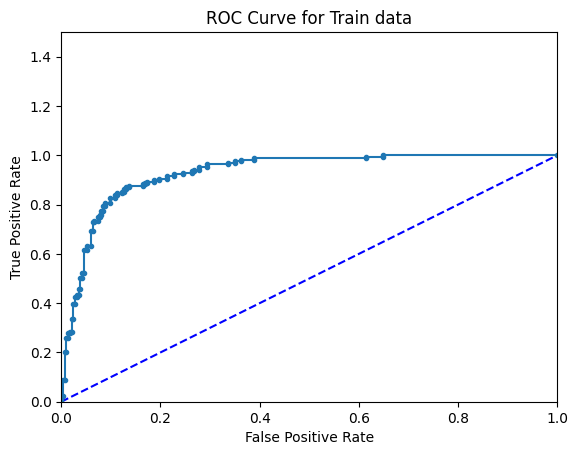

In [26]:
print("Avg Train Acc ==> ", spec_result['avg_train_acc'])
print("Avg Train Precision ==> ", spec_result['avg_train_precision'])
print("Avg Train Recall ==> ", spec_result['avg_train_recall'])
print("Avg Train F1 Score ==> ", spec_result['avg_train_f1_score'])
print("Avg Train AUC ==> ", spec_result['avg_train_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Train Data")
spec_train_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
spec_train_rows = []
spec_train_rows.append(["Actual Pos(M)", train_tp, train_fn])
spec_train_rows.append(["Actual Neg(B)", train_fp, train_tn])
spec_train_conf_mat = pd.DataFrame(data=spec_train_rows, columns=spec_train_cols)
display(spec_train_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(train_fpr, train_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Train data")
plt.xlim([0,1])
plt.ylim([0,1.5])

Avg Test Acc ==>  0.9269565217391302
Avg Test Precision ==>  0.9674373383808555
Avg Test Recall ==>  0.8333333333333335
Avg Test F1 Score ==>  0.8946990234484846
Avg Test AUC ==>  0.9219422911283375
------------------------------------------------------
Confusion Matrix for Test Data


,,Predicted Pos(M),Predicted Neg(B)
0,Actual Pos(M),34,9
1,Actual Neg(B),2,70


------------------------------------------------------


(0.0, 1.5)

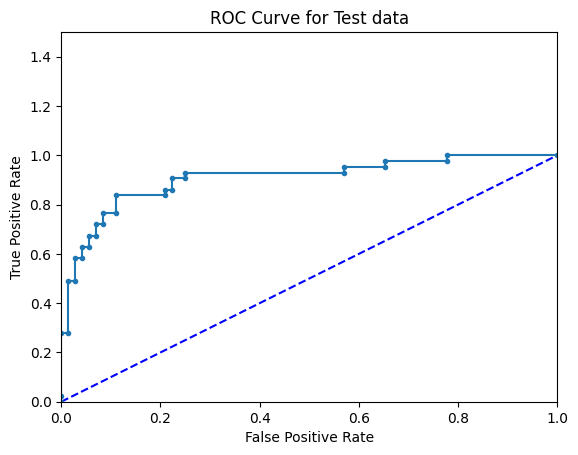

In [27]:
print("Avg Test Acc ==> ", spec_result['avg_test_acc'])
print("Avg Test Precision ==> ", spec_result['avg_test_precision'])
print("Avg Test Recall ==> ", spec_result['avg_test_recall'])
print("Avg Test F1 Score ==> ", spec_result['avg_test_f1_score'])
print("Avg Test AUC ==> ", spec_result['avg_test_auc'])
print("------------------------------------------------------")
print("Confusion Matrix for Test Data")
spec_test_cols = ["", "Predicted Pos(M)", "Predicted Neg(B)"]
spec_test_rows = []
spec_test_rows.append(["Actual Pos(M)", test_tp, test_fn])
spec_test_rows.append(["Actual Neg(B)", test_fp, test_tn])
spec_test_conf_mat = pd.DataFrame(data=spec_test_rows, columns=spec_test_cols)
display(spec_test_conf_mat)
print("------------------------------------------------------")
plt.plot([0,1], [0,1], color='blue', linestyle='--')
plt.plot(test_fpr, test_tpr, marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Test data")
plt.xlim([0,1])
plt.ylim([0,1.5])

<b> 1.(b) (v) One can expect that supervised learning on the full data set works better than
semi-supervised learning with half of the data set labeled.One can expect that
unsupervised learning underperforms in such situations. Compare the results
you obtained by those methods.</b>

In [28]:
print(sup_result.keys())

dict_keys(['avg_train_acc', 'avg_test_acc', 'avg_train_precision', 'avg_test_precision', 'avg_train_recall', 'avg_test_recall', 'avg_train_f1_score', 'avg_test_f1_score', 'avg_train_auc', 'avg_test_auc'])


In [29]:
res_comp_rows = []
res_comp_cols = ["", "Supervised", "Semi Supervised", "Unsupervised"]

res_comp_rows.append(["Average Train Acc", sup_result['avg_train_acc'], semi_sup_result['avg_train_acc'], unsup_result['avg_train_acc']])
res_comp_rows.append(["Average Test Acc", sup_result['avg_test_acc'], semi_sup_result['avg_test_acc'], unsup_result['avg_test_acc']])
res_comp_rows.append(["Average Train Precision", sup_result['avg_train_precision'], semi_sup_result['avg_train_precision'], unsup_result['avg_train_precision']])
res_comp_rows.append(["Average Test Precision", sup_result['avg_test_precision'], semi_sup_result['avg_test_precision'], unsup_result['avg_test_precision']])
res_comp_rows.append(["Average Train Recall", sup_result['avg_train_recall'], semi_sup_result['avg_train_recall'], unsup_result['avg_train_recall']])
res_comp_rows.append(["Average Test Recall", sup_result['avg_test_recall'], semi_sup_result['avg_test_recall'], unsup_result['avg_test_recall']])
res_comp_rows.append(["Average Train F1-Score", sup_result['avg_train_f1_score'], semi_sup_result['avg_train_f1_score'], unsup_result['avg_train_f1_score']])
res_comp_rows.append(["Average Test F1-Score", sup_result['avg_test_f1_score'], semi_sup_result['avg_test_f1_score'], unsup_result['avg_test_f1_score']])
res_comp_rows.append(["Average Train AUC", sup_result['avg_train_auc'], semi_sup_result['avg_train_auc'], unsup_result['avg_train_auc']])
res_comp_rows.append(["Average Test AUC", sup_result['avg_test_auc'], semi_sup_result['avg_test_auc'], unsup_result['avg_test_auc']])

res_comp_df = pd.DataFrame(data=res_comp_rows, columns=res_comp_cols)

In [30]:
display(res_comp_df)

,,Supervised,Semi Supervised,Unsupervised
0,Average Train Acc,0.987078,0.971659,0.925037
1,Average Test Acc,0.968696,0.951304,0.928986
2,Average Train Precision,0.992371,0.955960,0.950550
3,Average Test Precision,0.978285,0.936015,0.956753
4,Average Train Recall,0.972781,0.969034,0.842801
5,Average Test Recall,0.937984,0.934884,0.849612
6,Average Train F1-Score,0.982444,0.962292,0.893238
7,Average Test F1-Score,0.956915,0.934838,0.898976
8,Average Train AUC,0.998057,0.994657,0.926994
9,Average Test AUC,0.993465,0.989007,0.931309


In [31]:
print('After comparison it can be clearly observed that')
print('Supervised learning on the whole dataset works the best')
print('Semi Supervised learning with 50% labelled data works better than unsupervised learning')
print('Unsupervised learning in this is least optimal')

print('Supervised Learning > Semi Supervised Learning > Unsupervised learning')

After comparison it can be clearly observed that
Supervised learning on the whole dataset works the best
Semi Supervised learning with 50% labelled data works better than unsupervised learning
Unsupervised learning in this is least optimal
Supervised Learning > Semi Supervised Learning > Unsupervised learning


<b> 2. Active Learning Using Support Vector Machines</b>

<b> 2.(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication . Choose 472 data points ran- domly as the test set, and the remaining 900 points as the training set. This is a binary classification problem</b>

In [32]:
bank_data_location = "../data/data_banknote_authentication.txt"
bank_fts = ['variance', 'skewness', 'curtosis', 'entropy']
bank_df = pd.read_csv(bank_data_location, names = bank_fts+['class'])

In [33]:
display(bank_df)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [34]:
bank_train, bank_test = train_test_split(bank_df, train_size=900)

<b> 2.(b) Repeat each of the following two procedures 50 times. You will have 50 errors for
90 SVMs per each procedure.</b>

<b> 2.(b)(i) Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L 1 penalty. Select the penalty parameter using 5-fold cross validation. 4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning</b>

In [35]:
test_err = {}

for it in range(50):
    bank_train_cp = copy.deepcopy(bank_train)
    
    new_train_data = pd.DataFrame()
    
    ##new_batch = bank_train_cp.sample(10)
    
    for j in range(90):
        if len(bank_train_cp)!=0: ## adding 10 randomly selected points
            if len(new_train_data) == 0:
                train0 = bank_train_cp[bank_train_cp['class'] ==0].sample(5)
                train1 = bank_train_cp[bank_train_cp['class']==1].sample(5)
                new_batch = pd.concat([train0, train1], axis = 0)
            else:
                new_batch = bank_train_cp.sample(10)
            
        new_train_data = pd.concat([new_train_data, new_batch])
        for rws in new_batch.index:
            bank_train_cp = bank_train_cp.drop(rws)
            
        c_range = np.logspace(-1,4,20)
        svm_l1_model = LinearSVC(penalty='l1', dual=False)
        l1params = {'C': c_range}
        
        l1_grid_model = GridSearchCV(svm_l1_model, l1params, cv=KFold(5))
        l1_grid_model = l1_grid_model.fit(new_train_data[bank_fts], new_train_data['class'])
        
        test_pred = l1_grid_model.predict(bank_test[bank_fts])
        l1_test_acc = accuracy_score(test_pred, bank_test['class'])
        l1_test_err = 1 - l1_test_acc
        test_err[j] = test_err.get(j,0) + l1_test_err
        

In [36]:
## averaging the results
for x in test_err:
    test_err[x]/=50

In [37]:
pool_rows = [[(x+1)*10, test_err[x]] for x in test_err]
pool_cols = ["Training Data Size", "Average Test Error"]
pool_df = pd.DataFrame(data=pool_rows, columns=pool_cols)

In [38]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(pool_df)

    Training Data Size  Average Test Error
0                   10               0.125
1                   20               0.070
2                   30               0.049
3                   40               0.040
4                   50               0.033
5                   60               0.030
6                   70               0.030
7                   80               0.027
8                   90               0.027
9                  100               0.026
10                 110               0.024
11                 120               0.023
12                 130               0.022
13                 140               0.021
14                 150               0.019
15                 160               0.019
16                 170               0.019
17                 180               0.017
18                 190               0.017
19                 200               0.017
20                 210               0.017
21                 220               0.017
22         

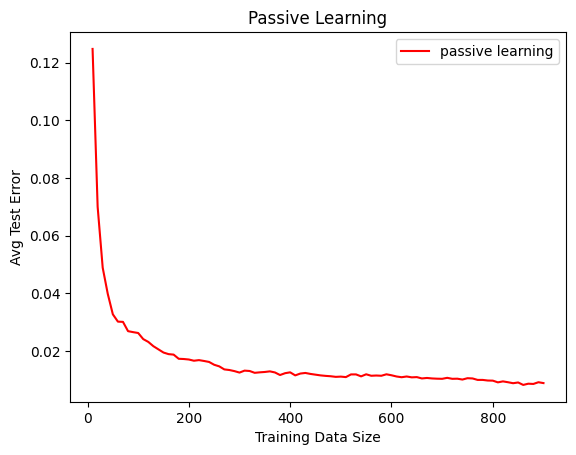

In [39]:
plt.xlabel('Training Data Size')
plt.ylabel('Avg Test Error')
plt.plot([x[0] for x in pool_rows], [x[1] for x in pool_rows], 'r', label='passive learning')
plt.title('Passive Learning')
plt.legend()

<b> 1.(b) (ii) Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L 1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM 6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning .</b>

In [40]:
test_err_active = {}

for it in range(50):
    bank_train_cp = copy.deepcopy(bank_train)
    
    new_train_data = pd.DataFrame()
    train0 = bank_train_cp[bank_train_cp['class'] ==0].sample(5)
    train1 = bank_train_cp[bank_train_cp['class']==1].sample(5)
    new_batch = pd.concat([train0, train1], axis = 0)
    
    for j in range(90):
        new_train_data = pd.concat([new_train_data, new_batch])
        for rws in new_batch.index:
            bank_train_cp = bank_train_cp.drop(rws)
            
        c_range = np.logspace(-1,4,20)
        svm_l1_model = LinearSVC(penalty='l1', dual=False)
        l1params = {'C': c_range}
        
        l1_grid_model = GridSearchCV(svm_l1_model, l1params, cv=KFold(5))
        l1_grid_model = l1_grid_model.fit(new_train_data[bank_fts], new_train_data['class'])
        
        if len(bank_train_cp)!=0: ## choosing nearest 10 points
            train_dist = l1_grid_model.decision_function(bank_train_cp[bank_fts])
            
            count = 0
            points = {}
            for indx in bank_train_cp.index:
                points[indx] = abs(train_dist[count])
                count+=1
            points = [[x,points[x]] for x in points]
            points = sorted(points, key = lambda x:x[1])
            
            new_batch = pd.DataFrame()
            for its,dist in points[:10]:
                new_batch.append(bank_train_cp.loc[its])
            new_batch = pd.DataFrame(new_batch)
                
        
        test_pred = l1_grid_model.predict(bank_test[bank_fts])
        l1_test_acc = accuracy_score(test_pred, bank_test['class'])
        l1_test_err = 1 - l1_test_acc
        test_err_active[j+1] = test_err_active.get(j+1,0) + l1_test_err
        

In [41]:
## averaging the results
for x in test_err_active:
    test_err_active[x]/=50

In [42]:
active_pool_rows = [[(x+1)*10, test_err_active[x]] for x in test_err_active]
active_pool_cols = ["Training Data Size", "Average Test Error"]
active_pool_df = pd.DataFrame(data=active_pool_rows, columns=active_pool_cols)

In [43]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(active_pool_df)

    Training Data Size  Average Test Error
0                   20               0.133
1                   30               0.135
2                   40               0.131
3                   50               0.133
4                   60               0.138
5                   70               0.134
6                   80               0.134
7                   90               0.138
8                  100               0.134
9                  110               0.135
10                 120               0.133
11                 130               0.135
12                 140               0.131
13                 150               0.135
14                 160               0.136
15                 170               0.133
16                 180               0.137
17                 190               0.132
18                 200               0.135
19                 210               0.141
20                 220               0.131
21                 230               0.137
22         

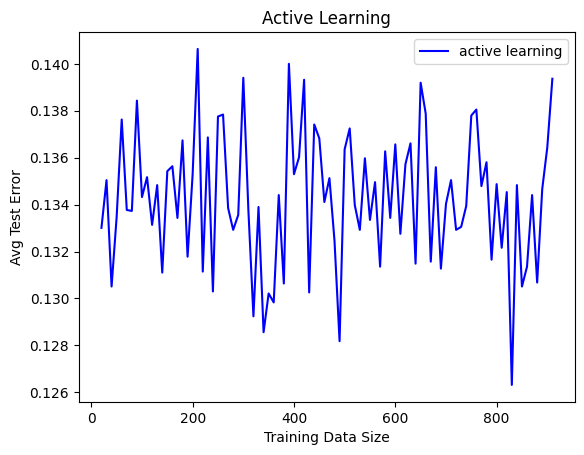

In [44]:
plt.xlabel('Training Data Size')
plt.ylabel('Avg Test Error')
plt.plot([x[0] for x in active_pool_rows], [x[1] for x in active_pool_rows], 'b', label='active learning')
plt.title('Active Learning')
plt.legend()

<b> 2.(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation</b>

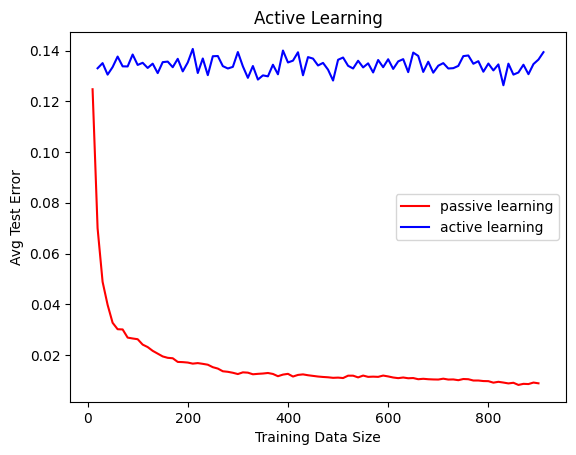

In [45]:
plt.xlabel('Training Data Size')
plt.ylabel('Avg Test Error')
plt.plot([x[0] for x in pool_rows], [x[1] for x in pool_rows], 'r', label='passive learning')
plt.plot([x[0] for x in active_pool_rows], [x[1] for x in active_pool_rows], 'b', label='active learning')
plt.title('Active Learning')
plt.legend()

In [46]:
print("We can conclude for passive learning the test error goes down with increasing train data size")
print("Though the active learning curve is fluctuating with training data size")

We can conclude for passive learning the test error goes down with increasing train data size
Though the active learning curve is fluctuating with training data size
